<a href="https://colab.research.google.com/github/corvusMidnight/corvusMidnight/blob/main/3.1%262_Shallow%26DeepNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

from  sklearn.preprocessing import LabelEncoder
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD 
from tensorflow.keras.metrics import categorical_crossentropy 
from tensorflow.keras.utils import to_categorical

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

#Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Sampling
import imblearn
from imblearn.combine import SMOTETomek 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

# Reading the Data Frame

In [ ]:
#Loading the dataframe
url = 'https://raw.githubusercontent.com/corvusMidnight/ml_I-II/main/Datasets/final_dataframe_(df3).csv?token=GHSAT0AAAAAABNKWUMGZNANQDVHTFMNQOZYYPB34CA'
df = pd.read_csv(url)

In [ ]:
df.head()

,Unnamed: 0,problem,personSearch,vehicleSearch,preRace,race,gender,lat,long,policePrecinct,neighborhood
0,2,Traffic Law Enforcement (P),1.0,1.0,Unknown,White,2.0,44.948350,-93.275380,5.0,Whittier
1,3,Suspicious Person (P),1.0,1.0,Unknown,Non-white,1.0,44.948360,-93.281350,5.0,Whittier
2,4,Traffic Law Enforcement (P),1.0,1.0,Unknown,White,2.0,44.979078,-93.262076,1.0,Downtown West
3,5,Traffic Law Enforcement (P),1.0,1.0,Unknown,Non-white,1.0,44.980535,-93.263627,1.0,Downtown West
4,6,Suspicious Person (P),1.0,1.0,Unknown,Non-white,1.0,44.980808,-93.273141,1.0,Downtown West


In [ ]:
#NA values

df.isna().sum()

Unnamed: 0            0
problem               0
personSearch      10259
vehicleSearch     10259
preRace           10259
race              10259
gender            10304
lat                   0
long                  0
policePrecinct      157
neighborhood        157
dtype: int64

In [ ]:
#Converting int64 and float64 to 32
df = df.astype({col: 'int32' for col in df.select_dtypes('int64').columns})
df = df.astype({col: 'float32' for col in df.select_dtypes('float64').columns})


In [ ]:
#Note: I have been struggling to run deep learning models. In the end, the best solution was to deal with the variour issues in a simpler way.
#Rather than imputing the 157 values that I had imputed in the linear models (the other 10259  values were dropped also in the other notebook as they all occurred for the same
#10259 rows).

df= df.dropna()
df=df.drop("Unnamed: 0",axis=1)

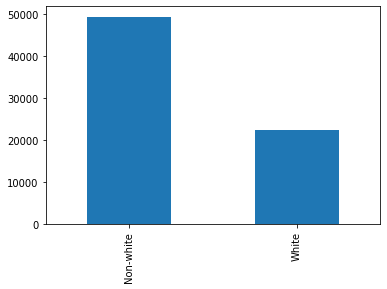

In [ ]:
df.race.value_counts().plot.bar()

In [ ]:
#A similar approach was taken for the encoding issue. All the non-numerical categorical variables were simply label encoded (including the outèut column, since not doing so causes issues later
#in the project when running the model)

le = LabelEncoder()

df["problem"]=le.fit_transform(df["problem"])
df["personSearch"]=le.fit_transform(df["personSearch"])
df["vehicleSearch"]=le.fit_transform(df["vehicleSearch"])
df["preRace"]=le.fit_transform(df["preRace"])
df["neighborhood"]=le.fit_transform(df["neighborhood"])
df["race"]=le.fit_transform(df["race"])

df

,problem,personSearch,vehicleSearch,preRace,race,gender,lat,long,policePrecinct,neighborhood
0,4,0,0,1,1,2.0,44.948349,-93.275383,5.0,83
1,2,0,0,1,0,1.0,44.948360,-93.281349,5.0,83
2,4,0,0,1,1,2.0,44.979076,-93.262077,1.0,19
3,4,0,0,1,0,1.0,44.980534,-93.263626,1.0,19
4,2,0,0,1,0,1.0,44.980808,-93.273140,1.0,19
...,...,...,...,...,...,...,...,...,...,...
82289,2,0,0,1,1,1.0,44.981819,-93.268089,1.0,19
82290,2,0,0,2,1,1.0,44.968899,-93.250320,1.0,10
82292,4,0,0,1,0,1.0,44.974472,-93.251152,1.0,18
82293,2,0,0,0,1,1.0,44.975033,-93.279724,1.0,19


Random over-sampling:
1    49382
0    49382
Name: race, dtype: int64


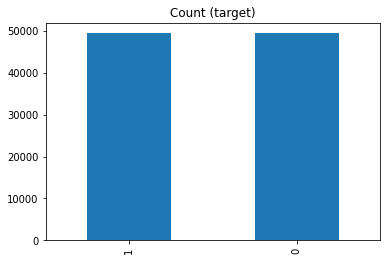

In [ ]:
#Sampling: here, I follow Keras instructions on how to deal with imbalanced data sets. I did not manage to make their solutions (the one with defining the functions and selecting
#me metric) work, as the loop provided took far too long to run. I followed the second technique, which conists of selecting random samples from the minority class and 
#adding them to match the lenght of the majority one. Rather than using their solution, which uses np.arrage (with which I am not too familiar), I have selected the .sample function
#which does the same thing

count_class_0, count_class_1 = df.race.value_counts()
df_class_0 = df[df['race'] == 0]
df_class_1 = df[df['race'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.race.value_counts())

df_test_over.race.value_counts().plot(kind='bar', title='Count (target)') #How does the value_counts of the output appear? If the code runned correctly, we should now have
#an equal number of samples

In [ ]:
#Input
X = df_test_over[['problem', 'vehicleSearch', 'preRace', 'personSearch', 'gender', 'policePrecinct', 'lat', 'long', 'neighborhood']]

#Output
y = df_test_over['race']



In [ ]:
sc = StandardScaler()

#It is strongly suggested to scale the whole dataframe. Althought it does not make sense to scale binary or categoricals, as they have no inherent numeric value, I have found
#that scaling X altogether betters the runtime without impacting the performance.

X_scaled=sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split (X_test, y_test, test_size=0.5, random_state=42)

print("X_train = ",X_train.shape )
print("y_train = ",y_train.shape )


print("X_test = ",X_test.shape )
print("y_test = ",y_test.shape )


print("X_valid = ",X_valid.shape )
print("y_valid = ",y_valid.shape )

X_train =  (59258, 9)
y_train =  (59258,)
X_test =  (19753, 9)
y_test =  (19753,)
X_valid =  (19753, 9)
y_valid =  (19753,)


#Model(s) 1: Shallow Neural Networks

> Indented block



In [ ]:
np.random.seed(1234)
tf.random.set_seed(1234)

#As a first model, I have selected a simple Sequential() model, like the one that was used in class. Note that some things have been changed:


early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

h1_logistic = tf.keras.Sequential()
h1_logistic.add(layers.Input(shape=(9,))) #The Input shape is 9, to match the X_train/test/val size.

h1_logistic.add(layers.Dense(1, #Because the model will produce a 0 or a 1, the last layer is just one neuron
                             name='softmax', activation='softmax')) 
#The dense layer uses softmax. In retrospect, starting from Softmax did not make much sense, as it caluclates its probabilities in order for them to sum up to one.
#In the case of a multiclass problem, this is useful, as the decrease in one or more of the classes causes an increase in probability of one of the others. For binaries,
#sigmoid grants an high probability for one of the two classes, both, or for none of them.

#Because the model will 

optimizer = tf.keras.optimizers.SGD(lr=0.01) #As a starting optmizer, I have selected SGD. The fact that the algorithm works to identify the weights that help minimize the loss
#function, made me assume that it would perform best with an imbalanced dataset

h1_logistic.compile(loss='binary_crossentropy',  #here, I have selected the binary crossentropy score, that is optimized for binary
                    #classification tasks
                            optimizer=optimizer, metrics=["acc"])

#Training the model
h1_logistic.fit(x=X_train, y=y_train, epochs=200, 
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
1852/1852 [==============================] - 4s 2ms/step - loss: 0.5140 - acc: 0.5006 - val_loss: 0.4619 - val_acc: 0.4995
Epoch 2/200
1852/1852 [==============================] - 3s 2ms/step - loss: 0.4676 - acc: 0.5006 - val_loss: 0.4553 - val_acc: 0.4995
Epoch 3/200
1852/1852 [==============================] - 3s 2ms/step - loss: 0.4651 - acc: 0.5006 - val_loss: 0.4540 - val_acc: 0.4995
Epoch 4/200
1852/1852 [==============================] - 3s 2ms/step - loss: 0.4646 - acc: 0.5006 - val_loss: 0.4536 - val_acc: 0.4995
Epoch 5/200
1852/1852 [==============================] - 3s 2ms/step - loss: 0.4644 - acc: 0.5006 - val_loss: 0.4534 - val_acc: 0.4995
Epoch 6/200
1852/1852 [==============================] - 3s 2ms/step - loss: 0.4644 - acc: 0.5006 - val_loss: 0.4534 - val_acc: 0.4995
Epoch 7/200
1852/1852 [==============================] - 3s 2ms/step - loss: 0.4643 - acc: 0.5006 - val_loss: 0.4533 - val_acc: 0.4995
Epoch 8/200
1852/1852 [==============================] 

In [ ]:
#As can be seen above, there seems to be not much different across epochs between training and validation in both loss and accuracy. Both metrics remain
#too high and low respectively, and differ of a few decimal points. This may mean that the model is underfitting, as is struggles to better its performance even with
#more data points.

h1_pred = h1_logistic.predict(X_valid)
print("Accuracy: ",  accuracy_score(y_valid, h1_pred),
      ", MSE: ", mse(y_valid, h1_pred),
      ", MAE", mae(y_valid, h1_pred))

Accuracy:  0.32042933810375673 , MSE:  0.6795706618962433 , MAE 0.6795706618962433


In [ ]:
np.random.seed(1234)
tf.random.set_seed(1234)

#The previous models showed a low accuracy. My assumption is that the 'softmax' activation is not ideal for binary classification issue

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

h_logistic = tf.keras.Sequential()
h_logistic.add(layers.Input(shape=(9,)))
h_logistic.add(layers.Dense(units =1,  activation='sigmoid')) #Here, the activation has been changed to sigmoid
optimizer = tf.keras.optimizers.SGD(lr=0.01)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
h_logistic.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["acc"])

#Training the model
h_logistic.fit(x=X_train, y=y_train, epochs=200, 
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping])

Epoch 1/200
1852/1852 [==============================] - 4s 2ms/step - loss: 0.5140 - acc: 0.7005 - val_loss: 0.4619 - val_acc: 0.7267
Epoch 2/200
1852/1852 [==============================] - 3s 2ms/step - loss: 0.4676 - acc: 0.7189 - val_loss: 0.4553 - val_acc: 0.7279
Epoch 3/200
1852/1852 [==============================] - 3s 2ms/step - loss: 0.4651 - acc: 0.7196 - val_loss: 0.4540 - val_acc: 0.7289
Epoch 4/200
1852/1852 [==============================] - 3s 2ms/step - loss: 0.4646 - acc: 0.7202 - val_loss: 0.4536 - val_acc: 0.7263
Epoch 5/200
1852/1852 [==============================] - 3s 2ms/step - loss: 0.4644 - acc: 0.7194 - val_loss: 0.4534 - val_acc: 0.7264
Epoch 6/200
1852/1852 [==============================] - 3s 2ms/step - loss: 0.4644 - acc: 0.7197 - val_loss: 0.4534 - val_acc: 0.7258
Epoch 7/200
1852/1852 [==============================] - 3s 2ms/step - loss: 0.4643 - acc: 0.7194 - val_loss: 0.4533 - val_acc: 0.7257
Epoch 8/200
1852/1852 [==============================] 

#Model(s) 2: Deep Neural Networks and further testing

In [ ]:
#Above, it is clear that the model performs much better when including a 'sigmoid' final layer. Note: calculating the MSE and the MAE for non-regression (i.e., classification)
#tasks.

#A curious phenomenon is that the validation loss and accuracy are both better (i.e., lower and higher, respectively) than the training data. I assume that this may have been caused
#higher intrinsic variance of the training set (since it has more entries), especially considered that the minority class samples were randomly generated to oversample the datafrane.

#Is now time to add more layers: the problem cannot clearly be solved as a linear problem, as it was highlighted both in the data visualization and the ML1 notebooks

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

h2_logistic = tf.keras.Sequential()
h2_logistic.add(layers.Input(shape=(9,)))
h2_logistic.add(layers.Dense(30, name='dense1', activation='relu'))
h2_logistic.add(layers.Dense(units = 100, activation = 'relu')) #Adding a 100-neuron layes
h2_logistic.add(layers.Dense(units = 50, activation = 'relu')) #Adding a 50-neuron layes
h2_logistic.add(layers.Dense(units =1,  activation='sigmoid'))
optimizer = Adam(learning_rate = 0.0001) #Since from now onwards I will be adding layers, to make the model more computationally economic, I have swapped SGD out for ADAM, which
#requires less memory space (and also works better for high-noise databases, like the one analyzed here)

#Learning rate improved

h2_logistic.compile(loss='binary_crossentropy',
                            optimizer=optimizer, metrics=["acc"])
h2_logistic.fit(x=X_train, y=y_train, epochs=200, 
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping])


Epoch 1/200
1852/1852 [==============================] - 6s 3ms/step - loss: 0.5019 - acc: 0.7220 - val_loss: 0.4466 - val_acc: 0.7497
Epoch 2/200
1852/1852 [==============================] - 5s 3ms/step - loss: 0.4549 - acc: 0.7415 - val_loss: 0.4409 - val_acc: 0.7545
Epoch 3/200
1852/1852 [==============================] - 4s 2ms/step - loss: 0.4510 - acc: 0.7463 - val_loss: 0.4394 - val_acc: 0.7528
Epoch 4/200
1852/1852 [==============================] - 4s 2ms/step - loss: 0.4490 - acc: 0.7484 - val_loss: 0.4374 - val_acc: 0.7561
Epoch 5/200
1852/1852 [==============================] - 4s 2ms/step - loss: 0.4476 - acc: 0.7499 - val_loss: 0.4374 - val_acc: 0.7580
Epoch 6/200
1852/1852 [==============================] - 4s 2ms/step - loss: 0.4467 - acc: 0.7507 - val_loss: 0.4368 - val_acc: 0.7561
Epoch 7/200
1852/1852 [==============================] - 4s 2ms/step - loss: 0.4458 - acc: 0.7514 - val_loss: 0.4359 - val_acc: 0.7589
Epoch 8/200
1852/1852 [==============================] 

In [ ]:
history=h2_logistic.fit(x = X_train, y = y_train, validation_data = (X_valid,y_valid), batch_size = 500, epochs = 100, shuffle = True )


Epoch 1/100
119/119 [==============================] - 1s 4ms/step - loss: 0.4392 - acc: 0.7575 - val_loss: 0.4324 - val_acc: 0.7596
Epoch 2/100
119/119 [==============================] - 0s 4ms/step - loss: 0.4391 - acc: 0.7578 - val_loss: 0.4324 - val_acc: 0.7596
Epoch 3/100
119/119 [==============================] - 1s 5ms/step - loss: 0.4390 - acc: 0.7575 - val_loss: 0.4325 - val_acc: 0.7599
Epoch 4/100
119/119 [==============================] - 0s 4ms/step - loss: 0.4390 - acc: 0.7586 - val_loss: 0.4324 - val_acc: 0.7599
Epoch 5/100
119/119 [==============================] - 0s 4ms/step - loss: 0.4390 - acc: 0.7573 - val_loss: 0.4324 - val_acc: 0.7605
Epoch 6/100
119/119 [==============================] - 0s 4ms/step - loss: 0.4390 - acc: 0.7581 - val_loss: 0.4324 - val_acc: 0.7597
Epoch 7/100
119/119 [==============================] - 0s 4ms/step - loss: 0.4389 - acc: 0.7582 - val_loss: 0.4325 - val_acc: 0.7589
Epoch 8/100
119/119 [==============================] - 0s 4ms/step - 

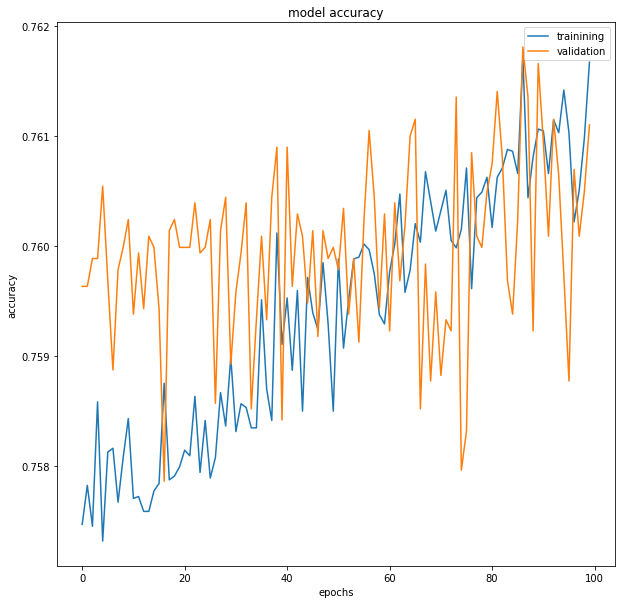

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')

plt.ylabel('accuracy') #Plotting the accuracy of the model based on epochs for both validation and training set
plt.xlabel('epochs')
plt.legend(['trainining', 'validation'])


plt.show()

#The graph below confirms the previous intuition: the accuracy of the validation is only initailly higher: the more epochs, the more the model learns from the training set while
#validation remains somewhat stable.

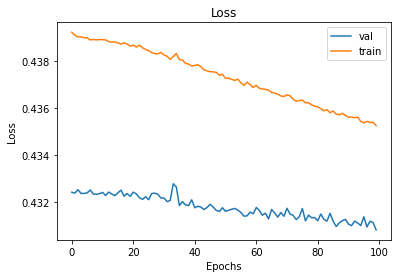

In [ ]:
plt.plot(history.history['val_loss'],  label='val') #As noted before, the validation loss is somewhat lower than the training loss (althought the latter seems to decrease more
#steadily than the former, thus indicating that variance rather than underfitting could be the cause of this phenomena)
plt.plot(history.history['loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
history_dict = history.history
loss_values = history.history['loss'] 
acc_values = history.history['acc'] 
num_epochs = 100

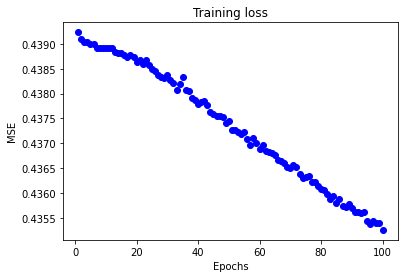

In [ ]:
epochs = range(1, num_epochs + 1) #Decrease in loss on the training set confirmed (model improves)
plt.plot(epochs, loss_values, 'bo')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('MSE');

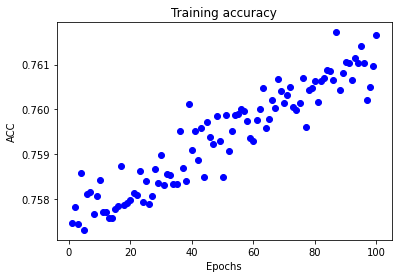

In [ ]:
plt.plot(epochs, acc_values, 'bo') #Standalone improvement of the accuracy on the training set
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC');

In [ ]:
#But does the model improve when adding more layers?
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True) #Adjusting the patience paramaters to give the model more epochs to improve

h3_logistic = tf.keras.Sequential()
h3_logistic.add(layers.Input(shape=(9,)))
h3_logistic.add(layers.Dense(30, name='dense1', activation='relu'))
h3_logistic.add(layers.Dense(units = 256, activation = 'relu')) #Adding a 256-neuron layes+
h3_logistic.add(layers.Dense(units = 128, activation = 'relu')) #Adding a 128-neuron layes
h3_logistic.add(layers.Dense(units = 64, activation = 'relu')) #Adding a 64-neuron layes
h3_logistic.add(layers.Dense(units = 32, activation = 'relu')) #Adding a 32-neuron layes
h3_logistic.add(layers.Dense(units = 16, activation = 'relu')) #Adding a 16-neuron layes
h3_logistic.add(layers.Dense(units =1,  activation='sigmoid'))
optimizer = Adam(learning_rate = 0.0001) 

h3_logistic.compile(loss='binary_crossentropy',
                            optimizer=optimizer, metrics=["acc"])
h3_logistic.fit(x=X_train, y=y_train, epochs=200, 
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping])


Epoch 1/200
1852/1852 [==============================] - 7s 3ms/step - loss: 0.4788 - acc: 0.7330 - val_loss: 0.4401 - val_acc: 0.7537
Epoch 2/200
1852/1852 [==============================] - 6s 3ms/step - loss: 0.4508 - acc: 0.7484 - val_loss: 0.4373 - val_acc: 0.7547
Epoch 3/200
1852/1852 [==============================] - 6s 3ms/step - loss: 0.4480 - acc: 0.7500 - val_loss: 0.4395 - val_acc: 0.7549
Epoch 4/200
1852/1852 [==============================] - 6s 3ms/step - loss: 0.4464 - acc: 0.7514 - val_loss: 0.4358 - val_acc: 0.7563
Epoch 5/200
1852/1852 [==============================] - 6s 3ms/step - loss: 0.4452 - acc: 0.7528 - val_loss: 0.4366 - val_acc: 0.7524
Epoch 6/200
1852/1852 [==============================] - 7s 4ms/step - loss: 0.4438 - acc: 0.7528 - val_loss: 0.4345 - val_acc: 0.7576
Epoch 7/200
1852/1852 [==============================] - 6s 4ms/step - loss: 0.4430 - acc: 0.7536 - val_loss: 0.4353 - val_acc: 0.7564
Epoch 8/200
1852/1852 [==============================] 

In [ ]:
#The model does not perform  better than the other one; however, h3 betters the score for the training set and also balanes out the variance issue (loss is lower for training
#than validation and the opposite for accuracy)
history=h3_logistic.fit(x = X_train, y = y_train, validation_data = (X_valid,y_valid), batch_size = 500, epochs = 100, shuffle = True )


Epoch 1/100
119/119 [==============================] - 1s 9ms/step - loss: 0.4196 - acc: 0.7704 - val_loss: 0.4285 - val_acc: 0.7613
Epoch 2/100
119/119 [==============================] - 1s 9ms/step - loss: 0.4186 - acc: 0.7725 - val_loss: 0.4285 - val_acc: 0.7610
Epoch 3/100
119/119 [==============================] - 1s 9ms/step - loss: 0.4182 - acc: 0.7724 - val_loss: 0.4287 - val_acc: 0.7597
Epoch 4/100
119/119 [==============================] - 1s 9ms/step - loss: 0.4180 - acc: 0.7731 - val_loss: 0.4287 - val_acc: 0.7617
Epoch 5/100
119/119 [==============================] - 1s 9ms/step - loss: 0.4177 - acc: 0.7726 - val_loss: 0.4289 - val_acc: 0.7612
Epoch 6/100
119/119 [==============================] - 1s 9ms/step - loss: 0.4176 - acc: 0.7724 - val_loss: 0.4289 - val_acc: 0.7611
Epoch 7/100
119/119 [==============================] - 1s 9ms/step - loss: 0.4174 - acc: 0.7738 - val_loss: 0.4292 - val_acc: 0.7609
Epoch 8/100
119/119 [==============================] - 1s 9ms/step - 

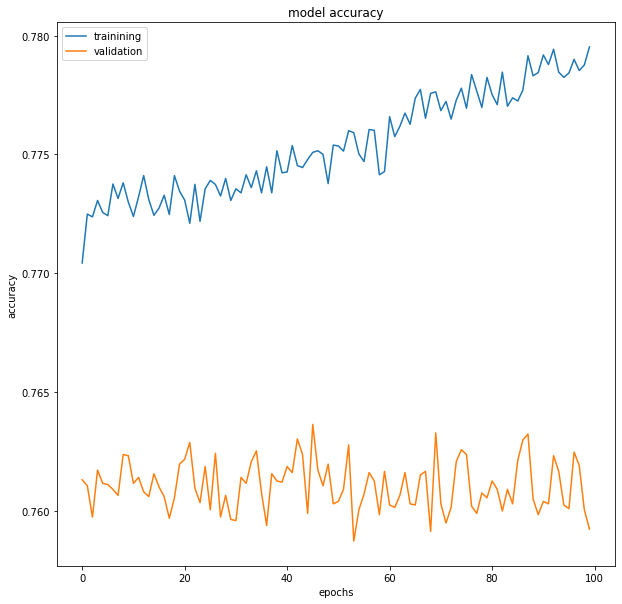

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')

plt.ylabel('accuracy') #Plotting the accuracy of the model based on epochs for both validation and training set
plt.xlabel('epochs')
plt.legend(['trainining', 'validation'])


plt.show()

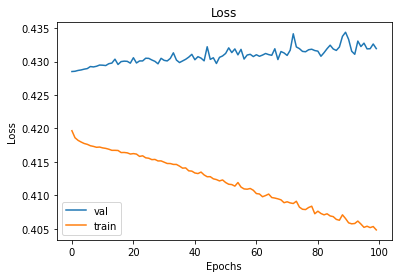

In [ ]:
plt.plot(history.history['val_loss'],  label='val')
plt.plot(history.history['loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#The graphs above confirm what has been said above: the deeper models performs better in terms of trainining set, learning more from the data (but also possibly overfitting)
#as epochs pass by while its loss diminishes. On the other hand, validation is here stable, both in terms of accuracy (<training accuracy) and loss (>training loss).
#Below, the exact accuracies for both training and validation sets are reported (the final traning accuracy is far better than h2, the model with less neurons)

In [ ]:
print('Train Split: ')
loss, accuracy = h3_logistic.evaluate(X_train, y_train, verbose=1)

print("Accuracy   : {} ".format(accuracy))

Train Split: 
1852/1852 [==============================] - 3s 1ms/step - loss: 0.4019 - acc: 0.7807
Accuracy   : 0.7806878685951233 


In [ ]:
print('Evaluation Split: ')
loss, accuracy =  h3_logistic.evaluate(X_valid, y_valid, verbose=2)

print("Accuracy   : {} ".format(accuracy))

Evaluation Split: 
618/618 - 1s - loss: 0.4319 - acc: 0.7592 - 735ms/epoch - 1ms/step
Accuracy   : 0.7592264413833618 


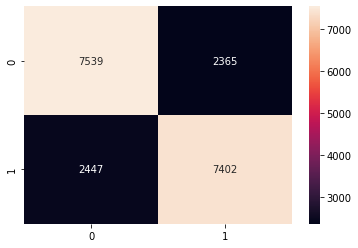

In [ ]:
#Finally, let's test the model on the test data


y_predict_h3 = h3_logistic.predict(X_test)
for i in range(len(y_predict_h3)):
    if y_predict_h3[i] > 0.5:
        y_predict_h3[i]=1
    else:
        y_predict_h3[i]=0
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_h3)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
print(f'The precision for the 0 (Non-white) class: {7539/(7539+2365)}') #TP/(TP+FP)
print(f'The recall for the 0 class: {7539/(7539+2447)}') #TP/(TP+FN)
print(f'The precision for the 1 (White) class: {7402/(7402+2447)}') #TN/(TN+FN)
print(f'The recall for the 1 clas: {7402/(7402+2365)}') #TN/(TN+FP)

#Due to the balancing techniques, the shallow and deep models return better, more balanced results that the classical models and show less overfitting\underfitting patterns.
#Note: apparently, these metrics have been removed from keras. It is possible to implement manually, but the code retrieved, althought functional, was behyond my comprehension.
#As such, I have decided to apply the formulas I was familiar with to retrieve recall and precision for the two classes.

The precision for the 0 (Non-white) class: 0.7612075928917609
The recall for the 0 class: 0.7549569397156018
The precision for the 1 (White) class: 0.7515483805462484
The recall for the 1 clas: 0.7578580935804239
